In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from math import exp

Text(0.5, 1.0, 'logit function')

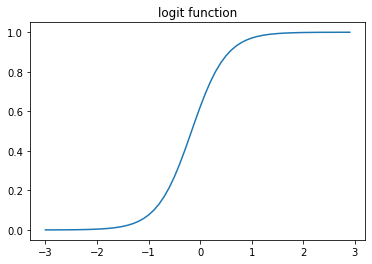

In [68]:
x = np.arange(-3, 3, 0.1)
b = [0.5, 3]
#z = [0.3*x_i + 2 for x_i in x]
y = [1 / (1 + exp(-b[0] - b[1]*x_i)) for x_i in x]

sns.lineplot(x,y).set_title('logit function')

In [146]:
# 输入z 向量，返回对数几率函数值
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#损失函数, y_hat, y 都是向量 [y1,y2,...yn]
def cross_entropy_loss(y_hat, y):
    n = len(y_hat)
    eplison = 0.00000001
    loss = -np.mean(y*(np.log(y_hat+eplison)) + (1-y)*np.log(1-y_hat+eplison))
    return loss

#梯度下降
# X 输入的数据矩阵 ， y_hat预测值
# 返回 w,b 
def gd(X, y, y_hat):
    n = len(y)
    
    #gradient of loss in w
    dw = (1/n) * np.dot(X.T, (y_hat - y))
    
    db = (1/n) * (y_hat - y)
    
    return dw, db

#模型训练过程
# x,y 数据
# epochs：训练多少轮
# lr 学习率
def fit_lr(X, y, epochs, lr):
    
    # n: number of taining points
    # p: number of features 
    n, p = X.shape
    w = np.zeros((p,1))
    b = 0
    
    y = y.reshape(n,1)
    
    losses = []
    
    for epoch in range(epochs+1):
        y_hat = sigmoid(np.dot(X, w) + b)
        dw, db = gd(X, y, y_hat)
        
        #update function parameters
        w = w - lr * dw
        b = b - lr * db
        
        #calculate loss
        l = cross_entropy_loss(y, sigmoid(np.dot(X, w) + b))
        if epoch % 10 == 0:
            print('Epoch ' , epoch, 'loss: ', round(l, 6))
        losses.append(l)
        
    print(len(w),'www',len(b))
    return w, b, losses

def predict(X, w, b):
    
    preds = sigmoid(np.dot(X, w) + b)
    
    #convert probability to classes
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

#计算准确率
# 输入预测的标签y_hat 向量
def get_acc(y, X, w ,b):
    true_positives = false_positives = true_negatives = false_negatives = 0
    y_hat = predict(X, w, b)
    
    
    for i in range(len(y)):
        if y[i] == y_hat[i]:                #true predict true
            true_positives += 1
        elif y[i] == 1 and y_hat[i] == 0:   #true we predict it's false
            false_negatives += 1
        elif y[i] == 0 and y_hat[i] == 1:  # false we predict it's true
            false_positives += 1
        else:                              #false and we predict it's false
            true_negatives += 1
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    return precision, recall

def get_acc2(y, X, w, b):
    y_hat = predict(X, w, b)
    #print(y_hat)
    acc = np.sum(y == y_hat) / len(y)
    return acc

#缩放数据
def normalize(X):
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X


#问题： xw+b, b的大小是(n*1), 导致如果输入train 和 test size不一致的话 矩阵相乘不对。


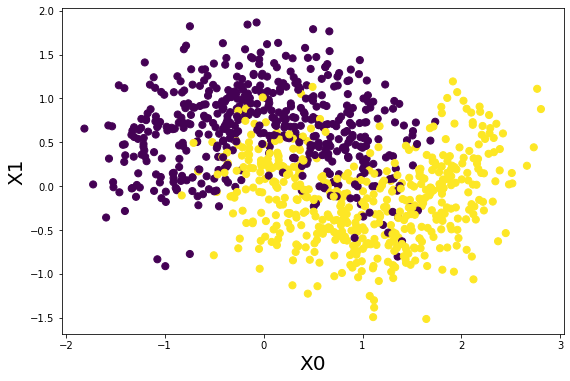

Epoch  0 loss:  9.209423
Epoch  10 loss:  9.200266
Epoch  20 loss:  9.19113
Epoch  30 loss:  9.182015
Epoch  40 loss:  9.172922
Epoch  50 loss:  9.16385
Epoch  60 loss:  9.154799
Epoch  70 loss:  9.14577
Epoch  80 loss:  9.136762
Epoch  90 loss:  9.127776
Epoch  100 loss:  9.118811
Epoch  110 loss:  9.109867
Epoch  120 loss:  9.100945
Epoch  130 loss:  9.092045
Epoch  140 loss:  9.083166
Epoch  150 loss:  9.074308
Epoch  160 loss:  9.065473
Epoch  170 loss:  9.056658
Epoch  180 loss:  9.047865
Epoch  190 loss:  9.039094
Epoch  200 loss:  9.030344
Epoch  210 loss:  9.021616
Epoch  220 loss:  9.012909
Epoch  230 loss:  9.004224
Epoch  240 loss:  8.995561
Epoch  250 loss:  8.986919
Epoch  260 loss:  8.978298
Epoch  270 loss:  8.969699
Epoch  280 loss:  8.961122
Epoch  290 loss:  8.952566
Epoch  300 loss:  8.944032
Epoch  310 loss:  8.935519
Epoch  320 loss:  8.927028
Epoch  330 loss:  8.918558
Epoch  340 loss:  8.91011
Epoch  350 loss:  8.901683
Epoch  360 loss:  8.893278
Epoch  370 loss:

In [153]:
# a = np.array([1,2,3])
# #a = np.array([a_i/2 for a_i in a ])
# for i in a:
#     print(i)
    

# 预备数据和训练
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.35)

X_train, y_train = X[ : 500], y[: 500]
X_test, y_test = X[500: ], y[500: ]



fig, ax = plt.subplots(figsize=(9, 6))
plt.xlabel("X0", fontsize=20)
plt.ylabel("X1", fontsize=20)
plt.scatter(X[:,0], X[:,1], s=50, c=y)
plt.show()


#X = normalize(X)
w, b, losses = fit_lr(X_train, y_train, epochs=500, lr=0.001)
print(len(w), len(b))
#acc = get_acc2(y, X, w, b)
#print(acc)
precision, recall = get_acc(y_test, X_test, w, b)
print("Model with precision: ", round(precision,4))
print("Model with recall: ", round(recall,4))

In [152]:
# fit in sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.848
Precision: 0.8333333333333334
Recall: 0.860655737704918
